In [71]:
#install any relevant imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [72]:
#load the csv and inspect its contents
df = pd.read_csv("github.csv")
df.head()

,Username,Repo_name,Stars,Url,Issues,Pull_Requests,Forks,Topics
0,mrdoob,three.js,7900,https://github.com/mrdoob/three.js,338.0,138,30600,3D
1,libgdx,libgdx,19600,https://github.com/libgdx/libgdx,164.0,61,6300,3D
2,pmndrs,react-three-fiber,16800,https://github.com/pmndrs/react-three-fiber,18.0,4,908,3D
3,BabylonJS,Babylon.js,15900,https://github.com/BabylonJS/Babylon.js,72.0,11,2700,3D
4,aframevr,aframe,13800,https://github.com/aframevr/aframe,310.0,39,3300,3D


In [73]:
#check for any missing values, here we have 26
df.isnull().values.any()
df.isnull().sum().sum()
#there are various ways to deal with missing values, as there is a small sample here, I am just going to delete the 
#rows in a df where there are missing values

df.dropna(inplace=True)

Text(0.5, 1.0, 'Number of Forks vs Number of Stars Graph Raw Data')

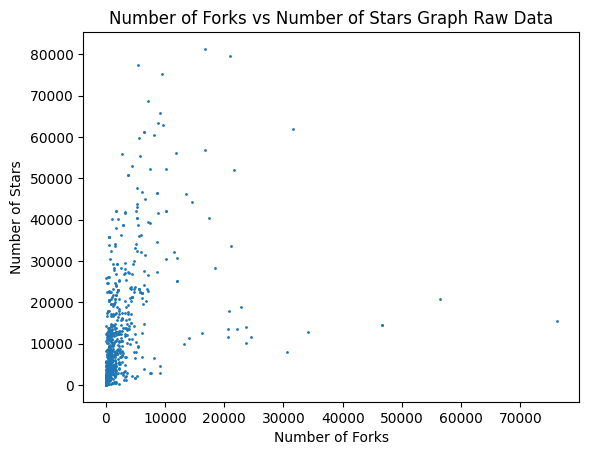

In [76]:
#Plot an iniital scatter plot number of  forks vs number of stars as a correlation is suspected


plt.scatter(df["Forks"], df["Stars"], s=1)
plt.xlabel("Number of Forks")
plt.ylabel("Number of Stars")

plt.title("Number of Forks vs Number of Stars Graph Raw Data")


In [77]:
#Do some iniital data cleaning
#overall the correlation is strong. The greater the number of forks, the greater the number of stars 
#arguably over 30000 forks we tend to have outliers, (many forks nut not that many stars, so remove this data from the csv ) 
first_clean_df = df[(df['Forks'] <= 25000) & (df['Stars'] <= 70000)]


In [78]:
#plot scatter plot again with the clean data
first_clean_df.head()

,Username,Repo_name,Stars,Url,Issues,Pull_Requests,Forks,Topics
1,libgdx,libgdx,19600,https://github.com/libgdx/libgdx,164.0,61,6300,3D
2,pmndrs,react-three-fiber,16800,https://github.com/pmndrs/react-three-fiber,18.0,4,908,3D
3,BabylonJS,Babylon.js,15900,https://github.com/BabylonJS/Babylon.js,72.0,11,2700,3D
4,aframevr,aframe,13800,https://github.com/aframevr/aframe,310.0,39,3300,3D
5,ssloy,tinyrenderer,12100,https://github.com/ssloy/tinyrenderer,26.0,0,1200,3D


Text(0.5, 1.0, 'Number of Forks vs Number of Stars Graph First cleaned Data')

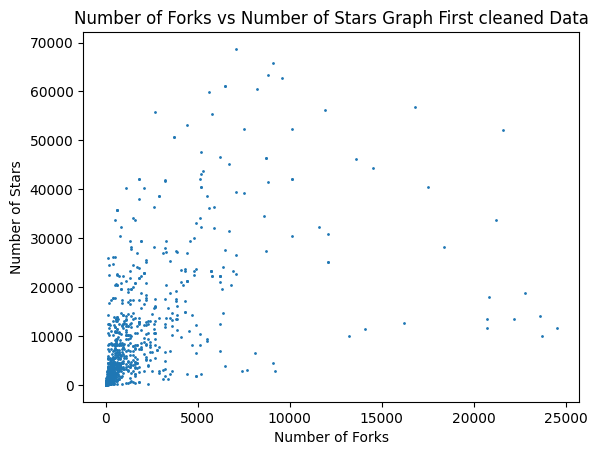

In [79]:
plt.scatter(first_clean_df["Forks"], first_clean_df["Stars"], s=1)
plt.xlabel("Number of Forks")
plt.ylabel("Number of Stars")

plt.title("Number of Forks vs Number of Stars Graph First cleaned Data")


C:\Users\amilc\AppData\Local\Temp\ipykernel_7548\914765167.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = first_clean_df.corr()


<AxesSubplot: >

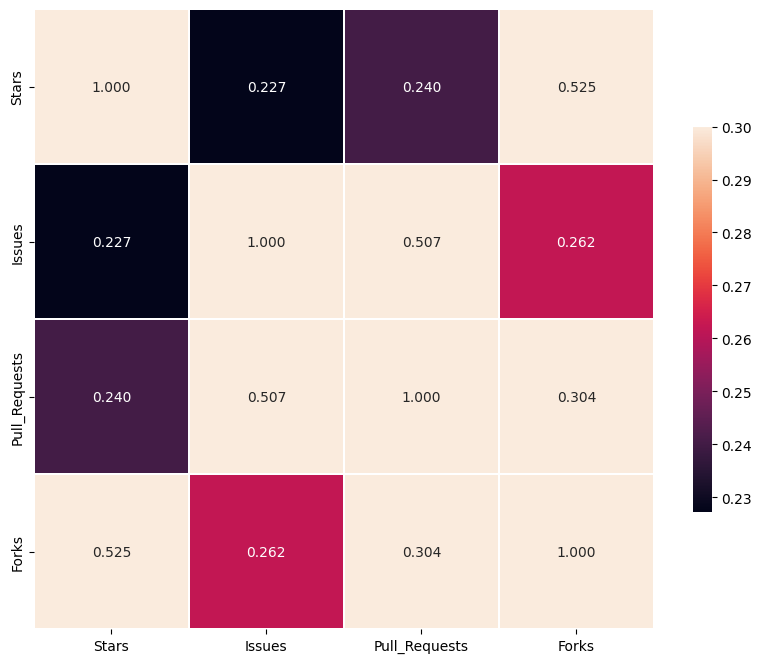

In [80]:
#draw a heatmap to better investigate the correlations beetweem the data
corr = first_clean_df.corr()

# Generate a mask for the upper triangle

    # Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10,10))

# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr,  vmax=0.3, square=True, cbar_kws={'shrink':0.5}, fmt='.3f', linewidths='0.05', annot=True)


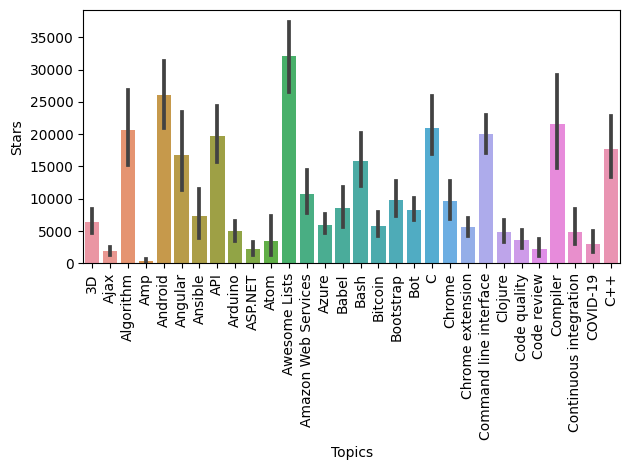

In [81]:
#finding which topic in the data has the most stars

topics = first_clean_df["Topics"]

sns.barplot(data=first_clean_df, x="Topics", y="Stars")
plt.xticks(rotation=90)
plt.tight_layout()

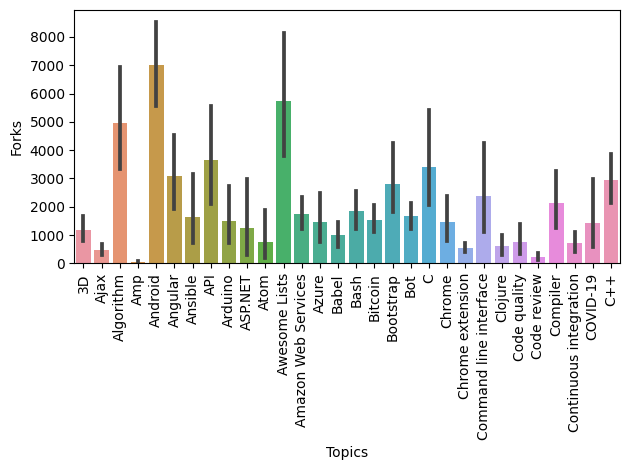

In [82]:
#project with greatest number of stars involve amazon web service

#mow let's investigate which project gets the most forks
topics = first_clean_df["Topics"]

sns.barplot(data=first_clean_df, x="Topics", y="Forks")
plt.xticks(rotation=90)
plt.tight_layout()